## 1.1 Подготовка обучающей и тестовой выборок

In [1]:
# загркузка нужных библиотек

In [2]:
import  pandas  as  pd 
 

In [3]:
import pickle

# загружаем  словарь для дальнейшей работы с ним 
with open('site.pkl', 'rb') as f:
    site_dict= pickle.load(f)

In [42]:
# загружаем  набор данных 
df = pd.read_csv('train_ses.csv')

In [5]:
def get_key(d, value):
    """функция  для получения ключа по  значению из  словаря """
    for k, v in d.items():
        if v == value:
            return k

In [6]:
# загружаем данные  видим  пропуски 
df

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,253557,3474,2013-11-25 10:26:54,3474.0,2013-11-25 10:26:58,141.0,2013-11-25 10:27:03,2428.0,2013-11-25 10:27:04,106.0,...,2013-11-25 10:27:16,2428.0,2013-11-25 10:27:28,2428.0,2013-11-25 10:27:40,2428.0,2013-11-25 10:27:52,148.0,2013-11-25 10:27:53,0
253557,253558,12727,2013-03-12 16:01:15,12727.0,2013-03-12 16:01:16,2215.0,2013-03-12 16:01:16,38.0,2013-03-12 16:01:17,2215.0,...,2013-03-12 16:01:17,25444.0,2013-03-12 16:01:18,2215.0,2013-03-12 16:01:18,23.0,2013-03-12 16:01:18,21.0,2013-03-12 16:01:18,0
253558,253559,2661,2013-09-12 14:05:03,15004.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:06:29,5562.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
253559,253560,812,2013-12-19 15:20:22,676.0,2013-12-19 15:20:22,814.0,2013-12-19 15:20:22,22.0,2013-12-19 15:20:22,39.0,...,2013-12-19 15:20:23,814.0,2013-12-19 15:20:23,570.0,2013-12-19 15:20:23,22.0,2013-12-19 15:20:24,570.0,2013-12-19 15:20:24,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  253561 non-null  int64  
 1   site1       253561 non-null  int64  
 2   time1       253561 non-null  object 
 3   site2       250098 non-null  float64
 4   time2       250098 non-null  object 
 5   site3       246919 non-null  float64
 6   time3       246919 non-null  object 
 7   site4       244321 non-null  float64
 8   time4       244321 non-null  object 
 9   site5       241829 non-null  float64
 10  time5       241829 non-null  object 
 11  site6       239495 non-null  float64
 12  time6       239495 non-null  object 
 13  site7       237297 non-null  float64
 14  time7       237297 non-null  object 
 15  site8       235224 non-null  float64
 16  time8       235224 non-null  object 
 17  site9       233084 non-null  float64
 18  time9       233084 non-null  object 
 19  si

сразу видим что некоторые  значения имеют тип  действительного числа , а другие целочисленные  , чтобы решить эту проблему приведем  все к единому формату 

In [8]:
df.describe()

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target
count,253561.00000,253561.000000,250098.000000,246919.000000,244321.000000,241829.000000,239495.000000,237297.000000,235224.000000,233084.000000,231052.000000,253561.000000
mean,126781.00000,3243.550144,3272.400883,3303.987757,3325.109422,3343.406035,3352.312637,3395.546771,3430.157765,3438.400088,3460.388861,0.009059
std,73196.90014,7247.006212,7307.480404,7347.809918,7371.245606,7379.758550,7380.413775,7435.727671,7473.417900,7471.062652,7492.447548,0.094747
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,63391.00000,53.000000,53.000000,53.000000,52.000000,52.000000,52.000000,55.000000,55.000000,55.000000,55.000000,0.000000
50%,126781.00000,677.000000,677.000000,677.000000,677.000000,678.000000,679.000000,679.000000,704.000000,733.000000,733.000000,0.000000
75%,190171.00000,1980.000000,1980.000000,1986.500000,1995.000000,2054.000000,2077.000000,2197.000000,2287.000000,2366.000000,2403.000000,0.000000
max,253561.00000,41601.000000,41600.000000,41599.000000,41599.000000,41599.000000,41600.000000,41600.000000,41601.000000,41601.000000,41601.000000,1.000000


выбросов  или аномальных  значений в наборе  как таковых  быть не может так как сайты  и  айди сессии просто числа 

In [44]:
df = df.astype({col: 'int64' for col in df.columns if df[col].dtype.kind in 'biufc'})

преобразовали к  целочисленному значению

In [ ]:
df.info()

In [ ]:

df.isna().sum()

In [ ]:
site_dict.values() == 0

в данных есть пропуски  в большом количестве  , заполним пропуски нулями , так как в нашем словаре  нет значений с индексом 0 

In [43]:
df = df.fillna(0)

преобразование  времени посещение к  временнному формату 

In [12]:
time_columns = df.select_dtypes('object').columns

In [61]:
df[time_columns] = df[time_columns].apply(pd.to_datetime)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   session_id  253561 non-null  int64         
 1   site1       253561 non-null  int64         
 2   time1       253561 non-null  datetime64[ns]
 3   site2       253561 non-null  int64         
 4   time2       253561 non-null  datetime64[ns]
 5   site3       253561 non-null  int64         
 6   time3       253561 non-null  datetime64[ns]
 7   site4       253561 non-null  int64         
 8   time4       253561 non-null  datetime64[ns]
 9   site5       253561 non-null  int64         
 10  time5       253561 non-null  datetime64[ns]
 11  site6       253561 non-null  int64         
 12  time6       253561 non-null  datetime64[ns]
 13  site7       253561 non-null  int64         
 14  time7       253561 non-null  datetime64[ns]
 15  site8       253561 non-null  int64         
 16  ti

In [15]:
df_ses1 = df[df['session_id'] == 1]

In [16]:
df_ses1

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,0,1970-01-01,0,1970-01-01,0,1970-01-01,0,...,1970-01-01,0,1970-01-01,0,1970-01-01,0,1970-01-01,0,1970-01-01,0


на каждого клиента максимум  1  запись  

## 1.2 Работа с разреженным форматом данных

In [17]:
# создаем список размерность 10  , чтобы потом сделать из  него  матрицу  
sessions = [df['site1'].values , df['site2'].values ,df['site3'].values ,df['site4'].values ,df['site5'].values ,df['site6'].values ,df['site7'].values ,df['site8'].values ,df['site9'].values ,df['site10'].values ]

In [18]:
import  numpy  as  np

In [19]:
# создаем  матрицу  размерностью  10  на  размерность словаря куда и будем записывать значения 
matrix = np.zeros((10 , len(site_dict)))

In [20]:
matrix.shape # размер совпадет  

(10, 48371)

проходимся  по  каждому из  10 элементов в списке  и  по всем значениям на тех  

In [21]:

for  i ,  session  in enumerate(sessions):
    for j ,  site  in  enumerate(session):
        if site  !=0:
             matrix[i , site]+=1


In [22]:
matrix.shape

(10, 48371)

In [23]:
new_col  = []
for i in range(1 , 48371):
    new_col.append( get_key(site_dict , i))

In [24]:
bag_of_sites = pd.DataFrame( matrix[:,1:], columns =new_col  )

In [25]:
bag_of_sites

,fpdownload2.macromedia.com,hotmail.fr,login.live.com,mail.live.com,dub122.mail.live.com,people.directory.live.com,secure.shared.live.com,windowslive.tt.omtrdc.net,cid-1bed360223325286.users.storage.live.com,js.live.net,...,lenergie-solaire.blogspot.com,www.ghsolar.be,i1-js-14-3-01-10977-128897839-i.init.cedexis-radar.net,www.portail-solaire.com,www.jennycraig.fr,www.ams.org,www.mathjax.org,lemonde-educ.blog.lemonde.fr,evcs-crl.ws.symantec.com,www.tunisie.campusfrance.org
0,1408.0,74.0,1769.0,156.0,130.0,339.0,347.0,439.0,4.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,238.0,44.0,1853.0,135.0,139.0,355.0,351.0,425.0,2.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200.0,32.0,1941.0,149.0,121.0,307.0,357.0,470.0,4.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,212.0,33.0,1886.0,158.0,118.0,308.0,310.0,533.0,4.0,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,205.0,27.0,1900.0,187.0,123.0,300.0,317.0,477.0,2.0,147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,168.0,27.0,1937.0,184.0,146.0,308.0,318.0,448.0,4.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,118.0,30.0,1756.0,228.0,132.0,299.0,336.0,448.0,3.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,160.0,22.0,1767.0,227.0,142.0,299.0,345.0,412.0,4.0,154.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,149.0,17.0,1712.0,171.0,155.0,311.0,345.0,429.0,10.0,159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,147.0,16.0,1609.0,213.0,115.0,310.0,313.0,417.0,5.0,147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
(df['site1'].values == 1).sum()

1408

## модуль б  

In [27]:
df

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,...,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0
1,2,890,2014-02-22 11:19:50,941,2014-02-22 11:19:50,3847,2014-02-22 11:19:51,941,2014-02-22 11:19:51,942,...,2014-02-22 11:19:51,3847,2014-02-22 11:19:52,3846,2014-02-22 11:19:52,1516,2014-02-22 11:20:15,1518,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39,2013-12-16 16:40:18,14768,2013-12-16 16:40:19,14769,2013-12-16 16:40:19,37,...,2013-12-16 16:40:19,14768,2013-12-16 16:40:20,14768,2013-12-16 16:40:21,14768,2013-12-16 16:40:22,14768,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782,2014-03-28 10:52:42,782,2014-03-28 10:53:12,782,2014-03-28 10:53:42,782,...,2014-03-28 10:54:42,782,2014-03-28 10:55:12,782,2014-03-28 10:55:42,782,2014-03-28 10:56:12,782,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177,2014-02-28 10:55:22,175,2014-02-28 10:55:22,178,2014-02-28 10:55:23,177,...,2014-02-28 10:55:59,175,2014-02-28 10:55:59,177,2014-02-28 10:55:59,177,2014-02-28 10:57:06,178,2014-02-28 10:57:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,253557,3474,2013-11-25 10:26:54,3474,2013-11-25 10:26:58,141,2013-11-25 10:27:03,2428,2013-11-25 10:27:04,106,...,2013-11-25 10:27:16,2428,2013-11-25 10:27:28,2428,2013-11-25 10:27:40,2428,2013-11-25 10:27:52,148,2013-11-25 10:27:53,0
253557,253558,12727,2013-03-12 16:01:15,12727,2013-03-12 16:01:16,2215,2013-03-12 16:01:16,38,2013-03-12 16:01:17,2215,...,2013-03-12 16:01:17,25444,2013-03-12 16:01:18,2215,2013-03-12 16:01:18,23,2013-03-12 16:01:18,21,2013-03-12 16:01:18,0
253558,253559,2661,2013-09-12 14:05:03,15004,2013-09-12 14:05:10,5562,2013-09-12 14:05:10,5562,2013-09-12 14:06:29,5562,...,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0
253559,253560,812,2013-12-19 15:20:22,676,2013-12-19 15:20:22,814,2013-12-19 15:20:22,22,2013-12-19 15:20:22,39,...,2013-12-19 15:20:23,814,2013-12-19 15:20:23,570,2013-12-19 15:20:23,22,2013-12-19 15:20:24,570,2013-12-19 15:20:24,0


In [28]:
df.target.value_counts()

target
0    251264
1      2297
Name: count, dtype: int64

## 2.1 визуальный анализ данных 

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df_corr = df.select_dtypes('int64').columns

In [31]:
df[df_corr].corr()

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target
session_id,1.000000,0.000148,-0.000400,0.002566,0.000320,0.000079,-0.000235,0.001710,-0.001001,-0.000827,0.000133,-0.000825
site1,0.000148,1.000000,0.513716,0.497520,0.474419,0.449183,0.430383,0.418848,0.405717,0.393657,0.382033,-0.001635
site2,-0.000400,0.513716,1.000000,0.527146,0.498633,0.476546,0.454440,0.435723,0.423285,0.405872,0.397633,-0.003054
site3,0.002566,0.497520,0.527146,1.000000,0.528651,0.498562,0.472599,0.454321,0.438389,0.420784,0.409079,-0.003669
site4,0.000320,0.474419,0.498633,0.528651,1.000000,0.526660,0.496699,0.475118,0.455750,0.434513,0.424168,-0.001922
site5,0.000079,0.449183,0.476546,0.498562,0.526660,1.000000,0.518673,0.495711,0.474597,0.452938,0.434494,-0.003936
site6,-0.000235,0.430383,0.454440,0.472599,0.496699,0.518673,1.000000,0.519324,0.496326,0.465854,0.450645,-0.002158
site7,0.001710,0.418848,0.435723,0.454321,0.475118,0.495711,0.519324,1.000000,0.524681,0.497330,0.473671,-0.000531
site8,-0.001001,0.405717,0.423285,0.438389,0.455750,0.474597,0.496326,0.524681,1.000000,0.520038,0.494002,-0.003890
site9,-0.000827,0.393657,0.405872,0.420784,0.434513,0.452938,0.465854,0.497330,0.520038,1.000000,0.519438,-0.001561


<Axes: >

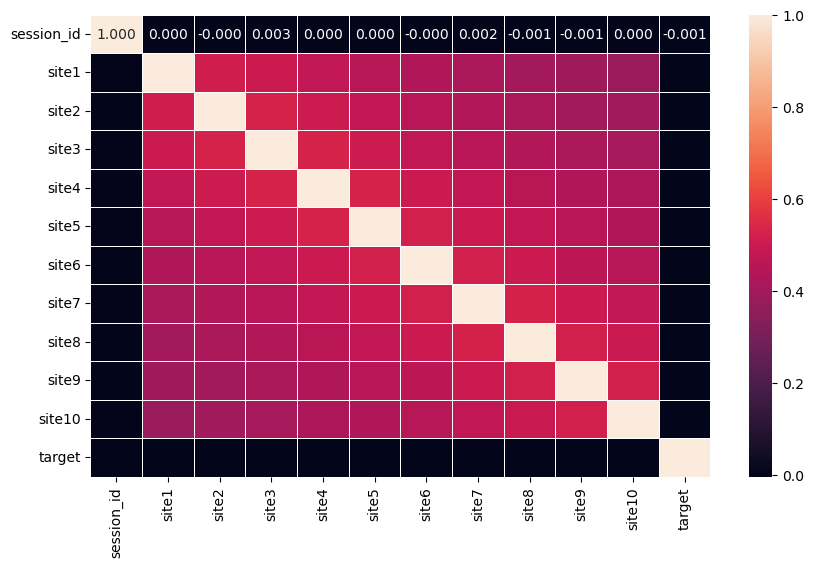

In [32]:

plt.figure(figsize = (10,6))
sns.heatmap(df[df_corr].corr() , annot = True , vmin=-0.003936, vmax=1 , linewidth=.5, fmt=".3f")

In [34]:
!pip install  catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 660.6 kB/s eta 0:02:34
   ---------------------------------------- 0.1/101.1 MB 1.1 MB/s eta 0:01:37
   ---------------------------------------- 0.2/101.1 MB 1.7 MB/s eta 0:00:59
   ---------------------------------------- 0.4/101.1 MB 2.0 MB/s eta 0:00:50
   ---------------------------------------- 0.7/101.1 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 1.1/101.1 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.7/101.1 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 1.8/101.1 MB 5.5 MB/s eta 0:00:19
    --------------------------------------- 2.0/101.1 MB 4.8 MB/s eta 0:00:21
   - -------------------------------------- 2.8/101.1 MB 6.1 MB/s eta 0:00:16
   - -------------------------------------- 3.8/101.1 MB 7.6 MB/s eta 0:00:13
   - -------------------------------------- 4.4/101.1 MB 7.9 MB/s eta

In [45]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [46]:
X  = df.drop('target' , axis = 1)
y = df['target']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22 , random_state=42 ,shuffle=True )

In [48]:
model = CatBoostClassifier()

In [49]:
model.fit(X_train, y_train , cat_features = time_columns.values)

Learning rate set to 0.098492
0:	learn: 0.4915095	total: 677ms	remaining: 11m 16s
1:	learn: 0.3525093	total: 1.21s	remaining: 10m 1s
2:	learn: 0.2593044	total: 1.74s	remaining: 9m 37s
3:	learn: 0.1970426	total: 2.2s	remaining: 9m 6s
4:	learn: 0.1540875	total: 2.67s	remaining: 8m 51s
5:	learn: 0.1247333	total: 3.12s	remaining: 8m 37s
6:	learn: 0.1047865	total: 3.6s	remaining: 8m 31s
7:	learn: 0.0902166	total: 4.15s	remaining: 8m 34s
8:	learn: 0.0799781	total: 4.7s	remaining: 8m 37s
9:	learn: 0.0722204	total: 5.21s	remaining: 8m 35s
10:	learn: 0.0661691	total: 5.7s	remaining: 8m 32s
11:	learn: 0.0619840	total: 6.2s	remaining: 8m 30s
12:	learn: 0.0585672	total: 6.7s	remaining: 8m 28s
13:	learn: 0.0559958	total: 7.18s	remaining: 8m 25s
14:	learn: 0.0544584	total: 7.67s	remaining: 8m 23s
15:	learn: 0.0531099	total: 8.17s	remaining: 8m 22s
16:	learn: 0.0519134	total: 8.64s	remaining: 8m 19s
17:	learn: 0.0509878	total: 9.1s	remaining: 8m 16s
18:	learn: 0.0500727	total: 9.56s	remaining: 8m 13s

In [50]:
fea_imp = model.get_feature_importance(prettified=True)
fea_imp

,Feature Id,Importances
0,site10,11.899368
1,site3,11.394165
2,site1,10.314422
3,site5,8.771333
4,site7,8.166958
5,site4,7.789151
6,site8,7.671785
7,site6,7.513621
8,site2,7.466260
9,site9,7.178244


In [67]:
def add_session_month_year(df):
    df['session_month_year1'] = (df['time1']).year * 100 + (df['time1']).month
    return df

In [68]:
df_nf =df.apply(add_session_month_year  , axis = 1)

In [70]:
df_nf

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,site7,time7,site8,time8,site9,time9,site10,time10,target,session_month_year1
0,1,718,2014-02-20 10:02:45,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,...,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,201402
1,2,890,2014-02-22 11:19:50,941,2014-02-22 11:19:50,3847,2014-02-22 11:19:51,941,2014-02-22 11:19:51,942,...,3847,2014-02-22 11:19:52,3846,2014-02-22 11:19:52,1516,2014-02-22 11:20:15,1518,2014-02-22 11:20:16,0,201402
2,3,14769,2013-12-16 16:40:17,39,2013-12-16 16:40:18,14768,2013-12-16 16:40:19,14769,2013-12-16 16:40:19,37,...,14768,2013-12-16 16:40:20,14768,2013-12-16 16:40:21,14768,2013-12-16 16:40:22,14768,2013-12-16 16:40:24,0,201312
3,4,782,2014-03-28 10:52:12,782,2014-03-28 10:52:42,782,2014-03-28 10:53:12,782,2014-03-28 10:53:42,782,...,782,2014-03-28 10:55:12,782,2014-03-28 10:55:42,782,2014-03-28 10:56:12,782,2014-03-28 10:56:42,0,201403
4,5,22,2014-02-28 10:53:05,177,2014-02-28 10:55:22,175,2014-02-28 10:55:22,178,2014-02-28 10:55:23,177,...,175,2014-02-28 10:55:59,177,2014-02-28 10:55:59,177,2014-02-28 10:57:06,178,2014-02-28 10:57:11,0,201402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,253557,3474,2013-11-25 10:26:54,3474,2013-11-25 10:26:58,141,2013-11-25 10:27:03,2428,2013-11-25 10:27:04,106,...,2428,2013-11-25 10:27:28,2428,2013-11-25 10:27:40,2428,2013-11-25 10:27:52,148,2013-11-25 10:27:53,0,201311
253557,253558,12727,2013-03-12 16:01:15,12727,2013-03-12 16:01:16,2215,2013-03-12 16:01:16,38,2013-03-12 16:01:17,2215,...,25444,2013-03-12 16:01:18,2215,2013-03-12 16:01:18,23,2013-03-12 16:01:18,21,2013-03-12 16:01:18,0,201303
253558,253559,2661,2013-09-12 14:05:03,15004,2013-09-12 14:05:10,5562,2013-09-12 14:05:10,5562,2013-09-12 14:06:29,5562,...,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,201309
253559,253560,812,2013-12-19 15:20:22,676,2013-12-19 15:20:22,814,2013-12-19 15:20:22,22,2013-12-19 15:20:22,39,...,814,2013-12-19 15:20:23,570,2013-12-19 15:20:23,22,2013-12-19 15:20:24,570,2013-12-19 15:20:24,0,201312


In [71]:
df_nf['num_sites_visited'] = df_nf[['site1', 'site2', 'site3', 'site4', 'site5', 'site6', 'site7', 'site8', 'site9', 'site10']].gt(0).sum(axis=1)

In [73]:
df_nf['session_duration'] = (pd.to_datetime(df_nf['time10']) - pd.to_datetime(df_nf['time1'])).dt.total_seconds()

In [76]:
df_nf['is_weekend'] = pd.to_datetime(df_nf['time1']).dt.day_name().isin(['Saturday', 'Sunday'])

In [77]:
df_nf

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time8,site9,time9,site10,time10,target,session_month_year1,num_sites_visited,session_duration,is_weekend
0,1,718,2014-02-20 10:02:45,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,...,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,201402,1,-1.392891e+09,False
1,2,890,2014-02-22 11:19:50,941,2014-02-22 11:19:50,3847,2014-02-22 11:19:51,941,2014-02-22 11:19:51,942,...,2014-02-22 11:19:52,1516,2014-02-22 11:20:15,1518,2014-02-22 11:20:16,0,201402,10,2.600000e+01,True
2,3,14769,2013-12-16 16:40:17,39,2013-12-16 16:40:18,14768,2013-12-16 16:40:19,14769,2013-12-16 16:40:19,37,...,2013-12-16 16:40:21,14768,2013-12-16 16:40:22,14768,2013-12-16 16:40:24,0,201312,10,7.000000e+00,False
3,4,782,2014-03-28 10:52:12,782,2014-03-28 10:52:42,782,2014-03-28 10:53:12,782,2014-03-28 10:53:42,782,...,2014-03-28 10:55:42,782,2014-03-28 10:56:12,782,2014-03-28 10:56:42,0,201403,10,2.700000e+02,False
4,5,22,2014-02-28 10:53:05,177,2014-02-28 10:55:22,175,2014-02-28 10:55:22,178,2014-02-28 10:55:23,177,...,2014-02-28 10:55:59,177,2014-02-28 10:57:06,178,2014-02-28 10:57:11,0,201402,10,2.460000e+02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,253557,3474,2013-11-25 10:26:54,3474,2013-11-25 10:26:58,141,2013-11-25 10:27:03,2428,2013-11-25 10:27:04,106,...,2013-11-25 10:27:40,2428,2013-11-25 10:27:52,148,2013-11-25 10:27:53,0,201311,10,5.900000e+01,False
253557,253558,12727,2013-03-12 16:01:15,12727,2013-03-12 16:01:16,2215,2013-03-12 16:01:16,38,2013-03-12 16:01:17,2215,...,2013-03-12 16:01:18,23,2013-03-12 16:01:18,21,2013-03-12 16:01:18,0,201303,10,3.000000e+00,False
253558,253559,2661,2013-09-12 14:05:03,15004,2013-09-12 14:05:10,5562,2013-09-12 14:05:10,5562,2013-09-12 14:06:29,5562,...,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,201309,5,-1.378995e+09,False
253559,253560,812,2013-12-19 15:20:22,676,2013-12-19 15:20:22,814,2013-12-19 15:20:22,22,2013-12-19 15:20:22,39,...,2013-12-19 15:20:23,22,2013-12-19 15:20:24,570,2013-12-19 15:20:24,0,201312,10,2.000000e+00,False


In [81]:
df_nf[time_columns] = df_nf[time_columns].astype(str)

In [82]:
X  = df_nf.drop('target' , axis = 1)
y = df_nf['target']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22 , random_state=42 ,shuffle=True )

In [84]:
model.fit(X_train, y_train , cat_features = time_columns.values)

Learning rate set to 0.098492
0:	learn: 0.4875164	total: 586ms	remaining: 9m 45s
1:	learn: 0.3505454	total: 1.15s	remaining: 9m 32s
2:	learn: 0.2562041	total: 1.47s	remaining: 8m 7s
3:	learn: 0.1943159	total: 1.97s	remaining: 8m 10s
4:	learn: 0.1508109	total: 2.47s	remaining: 8m 11s
5:	learn: 0.1221434	total: 3s	remaining: 8m 17s
6:	learn: 0.1019873	total: 3.61s	remaining: 8m 32s
7:	learn: 0.0867402	total: 4.13s	remaining: 8m 32s
8:	learn: 0.0770790	total: 4.67s	remaining: 8m 33s
9:	learn: 0.0693577	total: 5.2s	remaining: 8m 34s
10:	learn: 0.0636422	total: 5.7s	remaining: 8m 32s
11:	learn: 0.0590342	total: 6.2s	remaining: 8m 30s
12:	learn: 0.0555633	total: 6.68s	remaining: 8m 27s
13:	learn: 0.0530186	total: 7.18s	remaining: 8m 25s
14:	learn: 0.0509451	total: 7.67s	remaining: 8m 23s
15:	learn: 0.0493514	total: 8.17s	remaining: 8m 22s
16:	learn: 0.0482671	total: 8.66s	remaining: 8m 20s
17:	learn: 0.0473798	total: 9.15s	remaining: 8m 19s
18:	learn: 0.0466946	total: 9.64s	remaining: 8m 17s

In [85]:
fea_imp = model.get_feature_importance(prettified=True)
fea_imp

,Feature Id,Importances
0,session_month_year1,18.798815
1,session_duration,9.035941
2,is_weekend,7.317937
3,site10,7.011321
4,site9,6.647565
5,site3,6.497219
6,site7,6.048291
7,site5,5.660516
8,site1,5.615362
9,site4,5.595275


In [86]:
fea_imp = fea_imp[fea_imp['Importances'] >= 3.613132]

In [92]:
data = df_nf[fea_imp['Feature Id']]
data['target']  =  df_nf['target']

C:\Users\123\AppData\Local\Temp\ipykernel_13752\2500955932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']  =  df_nf['target']


In [93]:
data

,session_month_year1,session_duration,is_weekend,site10,site9,site3,site7,site5,site1,site4,site2,site6,site8,session_id,target
0,201402,-1.392891e+09,False,0,0,0,0,0,718,0,0,0,0,1,0
1,201402,2.600000e+01,True,1518,1516,3847,3847,942,890,941,941,3846,3846,2,0
2,201312,7.000000e+00,False,14768,14768,14768,14768,37,14769,14769,39,39,14768,3,0
3,201403,2.700000e+02,False,782,782,782,782,782,782,782,782,782,782,4,0
4,201402,2.460000e+02,False,178,177,175,175,177,22,178,177,178,177,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,201311,5.900000e+01,False,148,2428,141,2428,106,3474,2428,3474,2428,2428,253557,0
253557,201303,3.000000e+00,False,21,23,2215,25444,2215,12727,38,12727,23,2215,253558,0
253558,201309,-1.378995e+09,False,0,0,5562,0,5562,2661,5562,15004,0,0,253559,0
253559,201312,2.000000e+00,False,570,22,814,814,39,812,22,676,812,570,253560,0


In [2]:
data.to_csv('data.csv')

NameError: name 'data' is not defined

## модуль  в

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix , recall_score
from sklearn.preprocessing import LabelEncoder

загрузка данных с прошлой сессии

In [6]:
data = pd.read_csv('data.csv')

In [20]:
# удаляем  ненужные  колонки с повторной индексацией , которые  появились при сохранении 
data.drop(['Unnamed: 0.1' , 'Unnamed: 0'] , axis = 1 , inplace = True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   session_month_year1  253561 non-null  int64  
 1   session_duration     253561 non-null  float64
 2   is_weekend           253561 non-null  bool   
 3   site10               253561 non-null  int64  
 4   site9                253561 non-null  int64  
 5   site3                253561 non-null  int64  
 6   site7                253561 non-null  int64  
 7   site5                253561 non-null  int64  
 8   site1                253561 non-null  int64  
 9   site4                253561 non-null  int64  
 10  site2                253561 non-null  int64  
 11  site6                253561 non-null  int64  
 12  site8                253561 non-null  int64  
 13  session_id           253561 non-null  int64  
 14  target               253561 non-null  int64  
dtypes: bool(1), float

разделяем  данные  на тренировочную и тестовую  выборку  в соотношении 80 на 20  , что позволит избежать переобучения 

In [22]:
X  = data.drop('target' , axis = 1)
y = data['target']

In [23]:
# так же перемешиваем  данные  с парметром  шафл   = true  и  выставялем  один и тот же рандом стейт 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22 , random_state=42 ,shuffle=True )

вместо того чтобы  выбирать всего 3  алгоритма  ,  я  буду  обучать сразу  5 разных , чтобы выбрать из них лучший  и понять какой именно алгоритм показыет себя лучше на данной задачи 

In [19]:

models = {}
def train_validate_predict(classifier, x_train, y_train, x_test, y_test, index):
    '''функция  , которая  принимает в вход названеи модели классификации обучает её  на данныхи  выводит результат '''
    model = classifier
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test , y_pred , average='macro')
    models[index] = [f1 , recall]

в качестве  оценки рассматриваем recall  и f1 меру так как мы хотим  , чтобы все мошейничиские операции были обнаружены 

In [20]:

model_list = [DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, CatBoostClassifier, XGBClassifier,
             ]
model_names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'CatBoostClassifier', 'XGBClassifier',
             ]

index = 0
for classifier in model_list:
    train_validate_predict(classifier(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1

Learning rate set to 0.098492
0:	learn: 0.4897759	total: 15.8ms	remaining: 15.7s
1:	learn: 0.3518428	total: 31ms	remaining: 15.4s
2:	learn: 0.2586650	total: 47.2ms	remaining: 15.7s
3:	learn: 0.1938948	total: 60.6ms	remaining: 15.1s
4:	learn: 0.1519958	total: 76.5ms	remaining: 15.2s
5:	learn: 0.1225639	total: 90.4ms	remaining: 15s
6:	learn: 0.1023217	total: 108ms	remaining: 15.4s
7:	learn: 0.0885472	total: 122ms	remaining: 15.1s
8:	learn: 0.0782303	total: 134ms	remaining: 14.8s
9:	learn: 0.0697716	total: 152ms	remaining: 15s
10:	learn: 0.0637790	total: 168ms	remaining: 15.1s
11:	learn: 0.0597814	total: 184ms	remaining: 15.2s
12:	learn: 0.0565562	total: 203ms	remaining: 15.4s
13:	learn: 0.0538254	total: 221ms	remaining: 15.6s
14:	learn: 0.0519073	total: 238ms	remaining: 15.6s
15:	learn: 0.0502063	total: 257ms	remaining: 15.8s
16:	learn: 0.0491530	total: 271ms	remaining: 15.7s
17:	learn: 0.0482029	total: 287ms	remaining: 15.7s
18:	learn: 0.0472545	total: 303ms	remaining: 15.7s
19:	learn: 

In [21]:
models

{'DecisionTreeClassifier': [0.6584423861559292, 0.6705129819551194],
 'RandomForestClassifier': [0.6206617437946582, 0.5708028231129912],
 'GradientBoostingClassifier': [0.659984770558244, 0.6002127904465665],
 'CatBoostClassifier': [0.680885960800859, 0.6187959861265985],
 'XGBClassifier': [0.6621303576333979, 0.6040412521160812]}

по итогу выбираем  лучшую  по метрикам  модель 

In [23]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Определяем гиперпараметры, которые нужно подобрать
param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'l2_leaf_reg': [1, 3],
    'iterations': [100, 300]
}

# Создаем модель CatBoostRegressor
model = CatBoostClassifier()

# Создаем объект GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Обучаем модель на обучающем наборе данных X_train, y_train
grid_search.fit(X_train, y_train)

# Выводим лучшие гиперпараметры
print("Лучшие гиперпараметры: ", grid_search.best_params_)

# Выводим лучшую оценку
print("Лучшая оценка: ", grid_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
0:	learn: 0.5826291	total: 15.7ms	remaining: 4.69s
1:	learn: 0.4910023	total: 31.1ms	remaining: 4.64s
2:	learn: 0.4156558	total: 47.3ms	remaining: 4.68s
3:	learn: 0.3512599	total: 59.9ms	remaining: 4.43s
4:	learn: 0.3005283	total: 75ms	remaining: 4.42s
5:	learn: 0.2577941	total: 88ms	remaining: 4.31s
6:	learn: 0.2232958	total: 104ms	remaining: 4.34s
7:	learn: 0.1953270	total: 116ms	remaining: 4.25s
8:	learn: 0.1717618	total: 126ms	remaining: 4.07s
9:	learn: 0.1528966	total: 138ms	remaining: 4.01s
10:	learn: 0.1370710	total: 152ms	remaining: 4s
11:	learn: 0.1230717	total: 165ms	remaining: 3.96s
12:	learn: 0.1116703	total: 178ms	remaining: 3.93s
13:	learn: 0.1023810	total: 192ms	remaining: 3.91s
14:	learn: 0.0948009	total: 204ms	remaining: 3.88s
15:	learn: 0.0878157	total: 217ms	remaining: 3.85s
16:	learn: 0.0818938	total: 231ms	remaining: 3.84s
17:	learn: 0.0777022	total: 246ms	remaining: 3.85s
18:	learn: 0.0735698	total: 261m

подбираем  параметры  гридсерчем  так как он  самый  быстрый и  легковесный  

In [24]:
model = CatBoostClassifier(depth = 6 , iterations = 300 , learning_rate = 0.05)
model.fit(X_train, y_train)

0:	learn: 0.5803377	total: 13.9ms	remaining: 4.14s
1:	learn: 0.4883022	total: 28.4ms	remaining: 4.22s
2:	learn: 0.4125444	total: 40.1ms	remaining: 3.97s
3:	learn: 0.3499088	total: 53.3ms	remaining: 3.94s
4:	learn: 0.2983341	total: 66.2ms	remaining: 3.9s
5:	learn: 0.2559540	total: 78ms	remaining: 3.82s
6:	learn: 0.2218921	total: 92.4ms	remaining: 3.87s
7:	learn: 0.1942579	total: 106ms	remaining: 3.88s
8:	learn: 0.1709093	total: 120ms	remaining: 3.87s
9:	learn: 0.1511668	total: 132ms	remaining: 3.84s
10:	learn: 0.1354759	total: 145ms	remaining: 3.81s
11:	learn: 0.1227071	total: 158ms	remaining: 3.8s
12:	learn: 0.1119826	total: 172ms	remaining: 3.8s
13:	learn: 0.1030504	total: 182ms	remaining: 3.73s
14:	learn: 0.0949813	total: 194ms	remaining: 3.69s
15:	learn: 0.0885599	total: 207ms	remaining: 3.67s
16:	learn: 0.0826138	total: 222ms	remaining: 3.69s
17:	learn: 0.0782355	total: 231ms	remaining: 3.61s
18:	learn: 0.0742116	total: 245ms	remaining: 3.62s
19:	learn: 0.0705129	total: 259ms	remai

In [25]:
submit_proba_predictions = model.predict_proba(X_test)

In [26]:
X_test['target']  = submit_proba_predictions[:,1]

In [27]:
X_test

,session_month_year1,session_duration,is_weekend,site10,site9,site3,site7,site5,site1,site4,site2,site6,site8,session_id,target
140924,201403,-1.395261e+09,False,0,0,820,784,820,784,820,820,784,0,140925,0.001543
30686,201403,5.400000e+01,True,14,3,270,3,3,58,1171,59,8,8,30687,0.001247
122028,201311,3.100000e+01,False,812,617,814,814,814,814,616,616,616,814,122029,0.005798
162522,201402,7.930000e+02,False,306,305,1074,63,134,1074,134,1074,66,306,162523,0.002518
146786,201401,2.030000e+02,False,176,178,21,175,21,21,175,21,177,177,146787,0.002556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85362,201403,8.000000e+00,False,29,803,29,803,52,803,23,23,803,52,85363,0.009182
130605,201312,1.090000e+02,False,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,130606,0.001184
215023,201311,6.000000e+00,False,6126,10917,10958,11093,7980,11088,11096,18123,11106,7980,215024,0.005031
135820,201402,3.500000e+01,False,780,780,778,780,780,780,780,780,780,780,135821,0.002465


In [28]:
# сохраняем  выбранную  модель 
model.save_model('weight.pkl')

## модуль  г 

In [ ]:
import streamlit as st
import pandas as pd
from catboost import CatBoostClassifier

# Загрузка предобученной модели
model = CatBoostClassifier()
model.load_model('weight.pkl')

# Заголовок страницы
st.title('Приложение для предсказания с использованием модели машинного обучения')

# Функция для отображения справки
def show_help():
    st.write("""
    ## Справка
    Это приложение позволяет загрузить файл CSV и использовать предобученную модель машинного обучения для предсказания на основе данных из этого файла.

    ### Функции:
    1. Загрузка файла CSV: Нажмите на кнопку 'Загрузите файл CSV' и выберите файл с данными.
    2. Отображение загруженных данных: После загрузки файла, данные из него будут отображены на странице.
    3. Предсказание: Приложение использует предобученную модель машинного обучения для выполнения предсказаний на основе загруженных данных.
    4. Отображение предсказаний: Результаты предсказаний будут отображены на странице.
    """)

# Добавление кнопки /help
st.sidebar.markdown("## Справка")
if st.sidebar.button("/help"):
    show_help()

# Загрузка файла CSV
uploaded_file = st.file_uploader('Загрузите файл CSV', type='csv')

# Ввод данных через форму
with st.form("input_form"):
    session_month_year1 = st.text_input("session_month_year1")
    session_duration = st.number_input("session_duration")
    is_weekend = st.checkbox("is_weekend")
    site10 = st.number_input("site10")
    site9 = st.number_input("site9")
    site3 = st.number_input("site3")
    site7 = st.number_input("site7")
    site5 = st.number_input("site5")
    site1 = st.number_input("site1")
    site4 = st.number_input("site4")
    site2 = st.number_input("site2")
    site6 = st.number_input("site6")
    site8 = st.number_input("site8")
    session_id = st.text_input("session_id")
    submitted = st.form_submit_button("Submit")

if uploaded_file is not None:
    # Чтение данных из файла CSV
    data = pd.read_csv(uploaded_file)

    # Отображение загруженных данных
    st.write('Загруженные данные:')
    st.write(data)

    # Предсказание с использованием модели
    predictions = model.predict(data)

    # Отображение предсказаний
    st.write('Предсказания:')
    st.write(predictions)

elif submitted:
    # Создание DataFrame из введенных данных
    data = pd.DataFrame({
        'session_month_year1': [session_month_year1],
        'session_duration': [session_duration],
        'is_weekend': [is_weekend],
        'site10': [site10],
        'site9': [site9],
        'site3': [site3],
        'site7': [site7],
        'site5': [site5],
        'site1': [site1],
        'site4': [site4],
        'site2': [site2],
        'site6': [site6],
        'site8': [site8],
        'session_id': [session_id]
    })

    # Отображение введенных данных
    st.write('Введенные данные:')
    st.write(data)

    # Предсказание с использованием модели
    predictions = model.predict(data)

    # Отображение предсказаний
    st.write('Предсказания:')
    st.write(predictions)
